## Кейс "Diamonds"

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as skl
import seaborn as sns

In [7]:
# Читаем данные
df = pd.read_csv('diamonds.csv', index_col = 0)
df

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [12]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


### Поиск выбросов

In [16]:
import warnings
warnings.simplefilter('ignore')

<Axes: xlabel='x', ylabel='Density'>

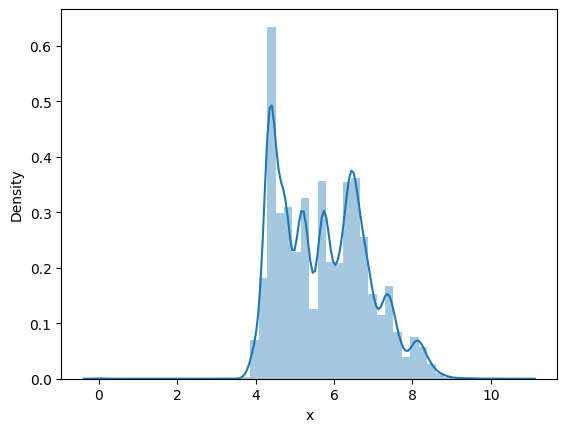

In [17]:
sns.distplot(df['x'])

<Axes: xlabel='y', ylabel='Density'>

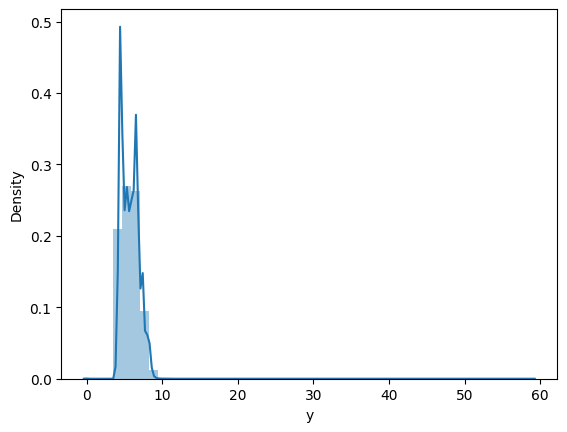

In [18]:
sns.distplot(df['y'])

<Axes: xlabel='z', ylabel='Density'>

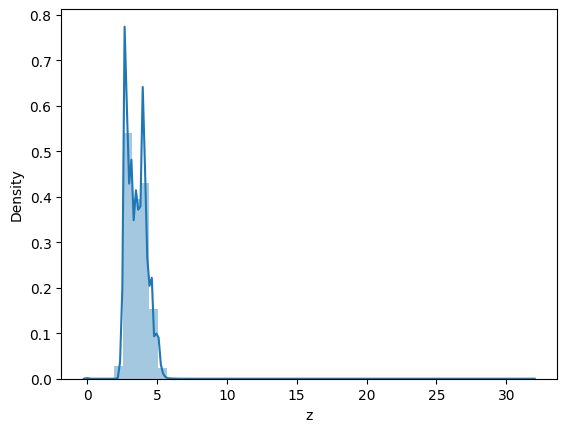

In [19]:
sns.distplot(df['z'])

<Axes: xlabel='carat', ylabel='Density'>

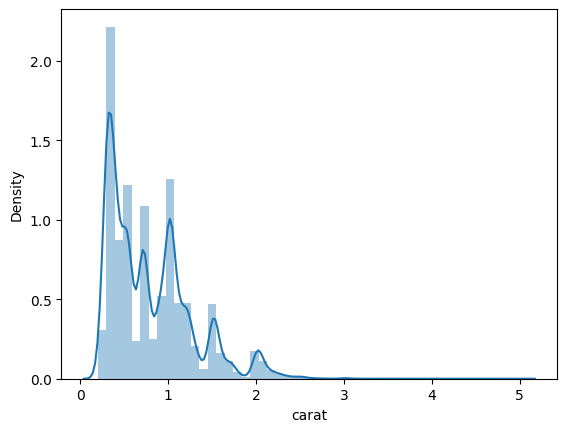

In [20]:
sns.distplot(df['carat'])

<Axes: xlabel='table', ylabel='Density'>

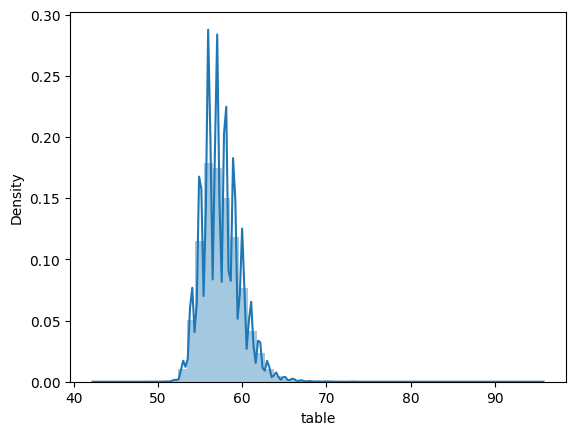

In [21]:
sns.distplot(df['table'])

<Axes: xlabel='depth', ylabel='Density'>

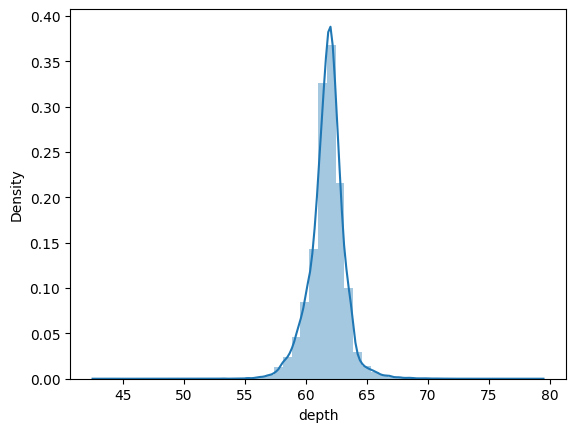

In [22]:
sns.distplot(df['depth'])

### Подавление выбросов

In [29]:
df_clear = df.copy()

df_clear.loc[df_clear['x'] < 2, 'x'] = 2
df_clear.loc[df_clear['x'] > 11, 'x'] = 11

df_clear.loc[df_clear['y'] < 2, 'y'] = 2
df_clear.loc[df_clear['y'] > 11, 'y'] = 11

df_clear.loc[df_clear['z'] < 2, 'z'] = 2
df_clear.loc[df_clear['z'] > 7, 'z'] = 7

df_clear.loc[df_clear['table'] < 45, 'table'] = 45
df_clear.loc[df_clear['table'] > 75, 'table'] = 75

df_clear.loc[df_clear['depth'] < 50, 'depth'] = 50
df_clear.loc[df_clear['depth'] > 75, 'depth'] = 75

df_clear.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749568,57.456776,3932.799722,5.731454,5.733512,3.539033
std,0.474011,1.426506,2.228784,3989.439738,1.120509,1.112673,0.692361
min,0.200000,50.000000,45.000000,326.000000,2.000000,2.000000,2.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,75.000000,75.000000,18823.000000,10.740000,11.000000,7.000000


### Кодирование категориальных данных методом replace

In [33]:
df_rank = df_clear.copy()

df_rank = df_rank.replace({'cut':{'Fair': 1, 'Good': 2, 'Very Good': 3, 'Premium': 4, 'Ideal': 5}})

df_rank = df_rank.replace({'color':{'D': 7, 'E': 6, 'F': 5, 'G': 4, 'H': 3, 'I': 2, 'J': 1}})

df_rank = df_rank.replace({'clarity':{'I1': 1, 'SI2': 2, 'SI1': 3, 'VS2': 4, 'VS1': 5, 'VVS2': 6, 'VVS1': 7, 'IF': 8}})

df_rank

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,5,6,2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,4,6,3,59.8,61.0,326,3.89,3.84,2.31
3,0.23,2,6,5,56.9,65.0,327,4.05,4.07,2.31
4,0.29,4,2,4,62.4,58.0,334,4.20,4.23,2.63
5,0.31,2,1,2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53936,0.72,5,7,3,60.8,57.0,2757,5.75,5.76,3.50
53937,0.72,2,7,3,63.1,55.0,2757,5.69,5.75,3.61
53938,0.70,3,7,3,62.8,60.0,2757,5.66,5.68,3.56
53939,0.86,4,3,2,61.0,58.0,2757,6.15,6.12,3.74


### Построение и обучение модели

In [37]:
X = df_rank.drop(columns = ['price']).to_numpy()
y = df_rank[['price']].to_numpy()

model = skl.LinearRegression()
model.fit(X,y)
model.score(X,y)

0.9075444677674195

### Кодирование категориальных данных методом OneHotEncoding

In [40]:
df_1henc = df_clear.copy()

df_1henc = pd.get_dummies(df_1henc, prefix = ['cut', 'color', 'clarity'])
df_1henc

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
1,0.23,61.5,55.0,326,3.95,3.98,2.43,False,False,True,...,False,False,False,False,False,True,False,False,False,False
2,0.21,59.8,61.0,326,3.89,3.84,2.31,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,0.23,56.9,65.0,327,4.05,4.07,2.31,False,True,False,...,False,False,False,False,False,False,True,False,False,False
4,0.29,62.4,58.0,334,4.20,4.23,2.63,False,False,False,...,True,False,False,False,False,False,False,True,False,False
5,0.31,63.3,58.0,335,4.34,4.35,2.75,False,True,False,...,False,True,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53936,0.72,60.8,57.0,2757,5.75,5.76,3.50,False,False,True,...,False,False,False,False,True,False,False,False,False,False
53937,0.72,63.1,55.0,2757,5.69,5.75,3.61,False,True,False,...,False,False,False,False,True,False,False,False,False,False
53938,0.70,62.8,60.0,2757,5.66,5.68,3.56,False,False,False,...,False,False,False,False,True,False,False,False,False,False
53939,0.86,61.0,58.0,2757,6.15,6.12,3.74,False,False,False,...,False,False,False,False,False,True,False,False,False,False


### Построение и обучение модели

In [41]:
X = df_1henc.drop(columns = ['price']).to_numpy()
y = df_1henc[['price']].to_numpy()

model = skl.LinearRegression()
model.fit(X,y)
model.score(X,y)

0.9201688538355802

### Построение и обучение квадратичной модели

In [44]:
df_1henc['carat^2'] = df_1henc['carat']**2
df_1henc['depth^2'] = df_1henc['depth']**2
df_1henc['table^2'] = df_1henc['table']**2
df_1henc['x^2'] = df_1henc['x']**2
df_1henc['y^2'] = df_1henc['y']**2
df_1henc['z^2'] = df_1henc['z']**2

df_1henc['carat*depth'] = df_1henc['carat']*df_1henc['depth']
df_1henc['carat*table'] = df_1henc['carat']*df_1henc['table']
df_1henc['carat*x'] = df_1henc['carat']*df_1henc['x']
df_1henc['carat*y'] = df_1henc['carat']*df_1henc['y']
df_1henc['carat*z'] = df_1henc['carat']*df_1henc['z']

df_1henc['depth*table'] = df_1henc['depth']*df_1henc['table']
df_1henc['depth*x'] = df_1henc['depth']*df_1henc['x']
df_1henc['depth*y'] = df_1henc['depth']*df_1henc['y']
df_1henc['depth*z'] = df_1henc['depth']*df_1henc['z']

df_1henc['table*x'] = df_1henc['table']*df_1henc['x']
df_1henc['table*y'] = df_1henc['table']*df_1henc['y']
df_1henc['table*z'] = df_1henc['table']*df_1henc['z']

df_1henc['x*y'] = df_1henc['x']*df_1henc['y']
df_1henc['x*z'] = df_1henc['x']*df_1henc['z']

df_1henc['y*z'] = df_1henc['y']*df_1henc['z']

X = df_1henc.drop(columns = ['price']).to_numpy()
y = df_1henc[['price']].to_numpy()

model = skl.LinearRegression()
model.fit(X,y)
model.score(X,y)

0.9315208450053071

In [48]:
model.predict(X).max()

23591.243648444783